# Predicting Developer Salaries

Let's try a regression approach! We will predict the yearly compensation based on developer profile, experience, and tech stack.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import xgboost as xgb


In [37]:
df = pd.read_csv('./data/survey_results_public.csv')
df.head()


/var/folders/d7/1mxt_jg524d9vgcmpm7h9lp80000gp/T/ipykernel_33093/1955588353.py:1: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/survey_results_public.csv')


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [50]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'EdLevel',
 'Employment',
 'EmploymentAddl',
 'WorkExp',
 'LearnCodeChoose',
 'LearnCode',
 'LearnCodeAI',
 'AILearnHow',
 'YearsCode',
 'DevType',
 'OrgSize',
 'ICorPM',
 'RemoteWork',
 'PurchaseInfluence',
 'TechEndorseIntro',
 'TechEndorse_1',
 'TechEndorse_2',
 'TechEndorse_3',
 'TechEndorse_4',
 'TechEndorse_5',
 'TechEndorse_6',
 'TechEndorse_7',
 'TechEndorse_8',
 'TechEndorse_9',
 'TechEndorse_13',
 'TechEndorse_13_TEXT',
 'TechOppose_1',
 'TechOppose_2',
 'TechOppose_3',
 'TechOppose_5',
 'TechOppose_7',
 'TechOppose_9',
 'TechOppose_11',
 'TechOppose_13',
 'TechOppose_16',
 'TechOppose_15',
 'TechOppose_15_TEXT',
 'Industry',
 'JobSatPoints_1',
 'JobSatPoints_2',
 'JobSatPoints_3',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_6',
 'JobSatPoints_7',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'JobSatPoints_10',
 'JobSatPoints_11',
 'JobSatPoints_13',
 'JobSatPoints_14',
 'JobSatPoints_15',
 'JobSatPoints_16',
 'JobSatPoints_15_TEXT',
 

### Pre-processing: filtering salary data


In [38]:
df_reg = df[df['ConvertedCompYearly'].notna()].copy()
df_reg['target'] = df_reg['ConvertedCompYearly']
df_reg = df_reg.drop(columns=['ConvertedCompYearly'])


In [39]:
df_reg['target'].describe()


count    2.394700e+04
mean     1.017615e+05
std      4.617569e+05
min      1.000000e+00
25%      3.817100e+04
50%      7.532000e+04
75%      1.205960e+05
max      5.000000e+07
Name: target, dtype: float64

(array([2.3935e+04, 7.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 5.00000090e+06, 1.00000008e+07, 1.50000007e+07,
        2.00000006e+07, 2.50000005e+07, 3.00000004e+07, 3.50000003e+07,
        4.00000002e+07, 4.50000001e+07, 5.00000000e+07]),
 <BarContainer object of 10 artists>)

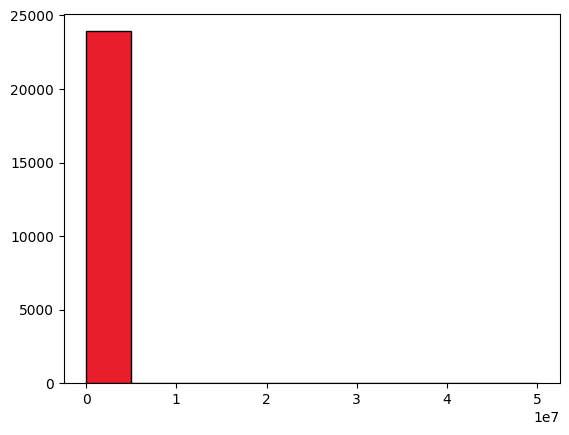

In [40]:
plt.hist(df_reg['target'], bins=10, color='#ea1d2cff', edgecolor='black')


We have some extreme outliers. Let's remove them so they don't get in the way of our model. Let's use the IQR method.


In [41]:
Q1 = df_reg['target'].quantile(0.25)
Q3 = df_reg['target'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(df_reg.shape[0])

df_reg = df_reg[(df_reg['target'] >= lower_bound) & (df_reg['target'] <= upper_bound)]

print(df_reg.shape[0])

23947
22885


(array([1683.,  855.,  657.,  533.,  558.,  586.,  542.,  678.,  711.,
         863.,  710.,  901.,  680.,  756.,  971.,  746.,  828.,  748.,
         496.,  779.,  689.,  521.,  520.,  583.,  453.,  307.,  374.,
         319.,  400.,  251.,  465.,  153.,  231.,  268.,  214.,  241.,
         216.,  137.,  171.,  107.,  270.,   66.,   90.,  107.,   76.,
          98.,   63.,  103.,   45.,   66.]),
 array([1.0000000e+00, 4.8809800e+03, 9.7609600e+03, 1.4640940e+04,
        1.9520920e+04, 2.4400900e+04, 2.9280880e+04, 3.4160860e+04,
        3.9040840e+04, 4.3920820e+04, 4.8800800e+04, 5.3680780e+04,
        5.8560760e+04, 6.3440740e+04, 6.8320720e+04, 7.3200700e+04,
        7.8080680e+04, 8.2960660e+04, 8.7840640e+04, 9.2720620e+04,
        9.7600600e+04, 1.0248058e+05, 1.0736056e+05, 1.1224054e+05,
        1.1712052e+05, 1.2200050e+05, 1.2688048e+05, 1.3176046e+05,
        1.3664044e+05, 1.4152042e+05, 1.4640040e+05, 1.5128038e+05,
        1.5616036e+05, 1.6104034e+05, 1.6592032e+05, 1.7

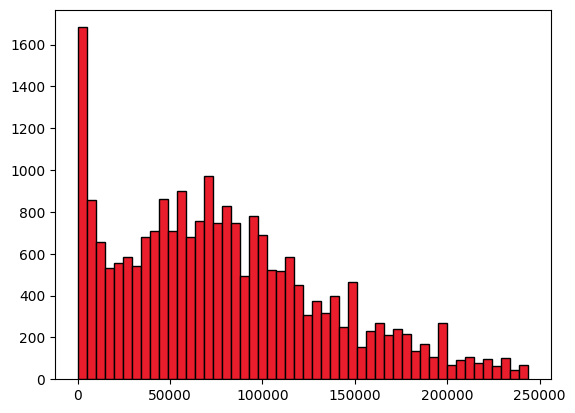

In [42]:
plt.hist(df_reg['target'], bins=50, color='#ea1d2cff', edgecolor='black')


In [43]:
len(df_reg[df_reg['target'] < 1000])

724

Way better! Now we can see the distribution of our data. This seems like an right-skewed kind-of normal distribution, with most people clustering around $ 1 - $ 50k, and some long tail to the right, with up to $ 250k (wish that was me...) values with decreasing frequency.

Knowing the distribution is always useful because, in some cases, we can test out using a transformation on our target that can make the distribution more normal and potentially improve our model performance! 

For example, if our target followed a log-normal distribution (which was one of my guesses), I could perform a log-transformation so I can turn the distribution of the target in a normal distribution. As it does not follow it, doing a log transformations just flips the side of the skew :p 

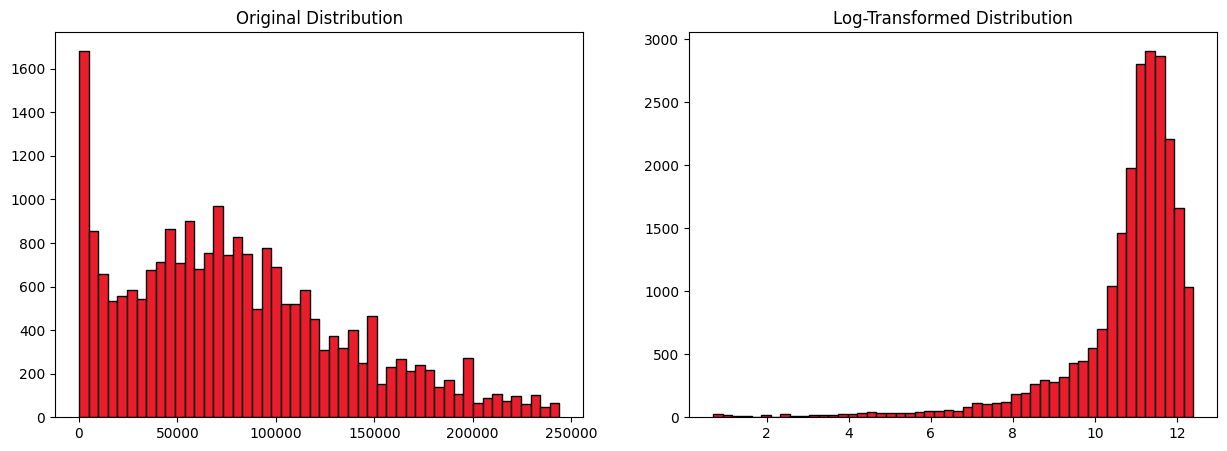

In [44]:
df_reg_log = df_reg.copy()
df_reg_log['log_target'] = np.log1p(df_reg_log['target'])  # log1p = log(1 + x)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_reg_log['target'], bins=50, color='#ea1d2cff', edgecolor='black')
axes[0].set_title('Original Distribution')

axes[1].hist(df_reg_log['log_target'], bins=50, color='#ea1d2cff', edgecolor='black')
axes[1].set_title('Log-Transformed Distribution')

plt.show()

### Feature Engineering: Categorial Variables

In [45]:
all_languages = df_reg['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
language_counts = all_languages.value_counts()

language_counts.head(20)


LanguageHaveWorkedWith
JavaScript                 14279
HTML/CSS                   13281
SQL                        12990
Python                     12062
Bash/Shell (all shells)    10539
TypeScript                  9879
C#                          6184
Java                        5951
PowerShell                  5172
C++                         4324
PHP                         4000
C                           3858
Go                          3491
Rust                        2884
Kotlin                      2290
Lua                         1751
Ruby                        1423
Dart                        1154
Swift                       1119
Groovy                      1114
Name: count, dtype: int64

In [46]:
top_20_languages = language_counts.head(20).index.tolist()

for lang in top_20_languages:
    df_reg[f'lang_{lang}'] = df_reg['LanguageHaveWorkedWith'].fillna('').str.contains(lang, regex=False).astype(int)


In [113]:
categorical_cols_all = df_reg.select_dtypes(include=['object']).columns.tolist()
categorical_cols_all = [c for c in categorical_cols_all if c != 'target']

In [114]:
list_aux = []

for col in categorical_cols_all:
    n_unique = df_reg[col].nunique()
    list_aux.append(n_unique)

series_aux = pd.Series(list_aux)
series_aux.describe()

count      119.000000
mean      1586.949580
std       2745.147212
min          2.000000
25%          8.500000
50%        398.000000
75%       1586.000000
max      14441.000000
dtype: float64

In [115]:
for col in categorical_cols_all:
    n_unique = df_reg[col].nunique()
    
    if n_unique < 10: 
        dummies = pd.get_dummies(df_reg[col], prefix=col, drop_first=True)
        df_reg = pd.concat([df_reg, dummies], axis=1)
        df_reg = df_reg.drop(col, axis=1)

print(df_reg.shape)

(22885, 278)


### Checking for Multicollinearity

Before selecting features, let's check if features are highly correlated with each other. High multicollinearity can hurt linear models.


In [116]:
numerical_cols = [col for col in df_reg.columns if df_reg[col].dtype in ['int64', 'float64'] and col not in ['target', 'ResponseId']]

corr_matrix = df_reg[numerical_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_pairs

[('WorkExp', 'YearsCode', np.float64(0.8462348440367627)),
 ('lang_JavaScript', 'lang_Java', np.float64(0.8571862477115163))]

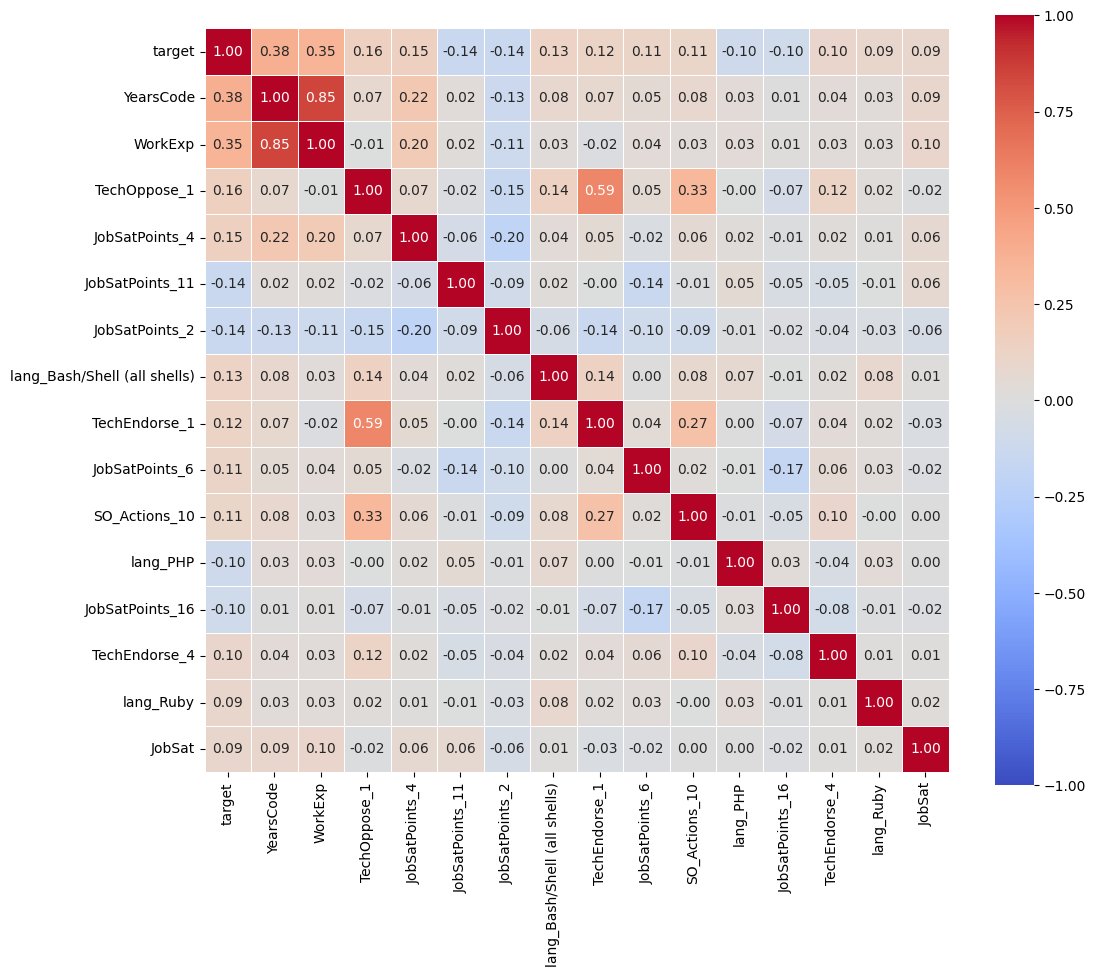

In [117]:

correlations = df_reg[numerical_cols + ['target']].corr()['target'].abs().sort_values(ascending=False)
top_corr_features = correlations.head(16).index.tolist()  

plt.figure(figsize=(12, 10))
sns.heatmap(df_reg[top_corr_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()


### Selecting features with correlation


In [118]:
correlations = df_reg[numerical_cols + ['target']].corr()['target'].abs().sort_values(ascending=False)
correlations = correlations.drop('target')
print(correlations.head(20))


YearsCode                       0.384870
WorkExp                         0.352213
TechOppose_1                    0.155992
JobSatPoints_4                  0.153491
JobSatPoints_11                 0.139455
JobSatPoints_2                  0.135120
lang_Bash/Shell (all shells)    0.126686
TechEndorse_1                   0.120400
JobSatPoints_6                  0.114561
SO_Actions_10                   0.107965
lang_PHP                        0.103750
JobSatPoints_16                 0.099558
TechEndorse_4                   0.097216
lang_Ruby                       0.092831
JobSat                          0.089636
TechOppose_9                    0.087614
lang_Go                         0.083330
JobSatPoints_1                  0.078625
JobSatPoints_10                 0.078434
TechOppose_13                   0.074473
Name: target, dtype: float64


Let's choose YearsCode over WorkExp.

### Preparing our dataset


In [119]:
top_features = correlations.head(15).index.tolist()
lang_columns = [col for col in df_reg.columns if col.startswith('lang_')]

df_ml = df_reg[top_features + lang_columns + ['JobSat'] +  ['target']].drop(columns=['WorkExp']).copy()
df_ml = df_ml.fillna(0)


In [120]:
df_ml.shape

(22885, 36)

## Simple Linear Regression

Let's start with the most correlated feature.


In [ ]:
most_correlated = correlations.index[0]
print(f"Most correlated feature: {most_correlated}")

X_simple = df_ml[[most_correlated]]
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


Most correlated feature: YearsCode


In [126]:
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

y_pred = lr_simple.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${mean_squared_error(y_test, y_pred, squared=False):,.0f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")


R² Score: 0.153
RMSE: $52,652
MAE: $41,434


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


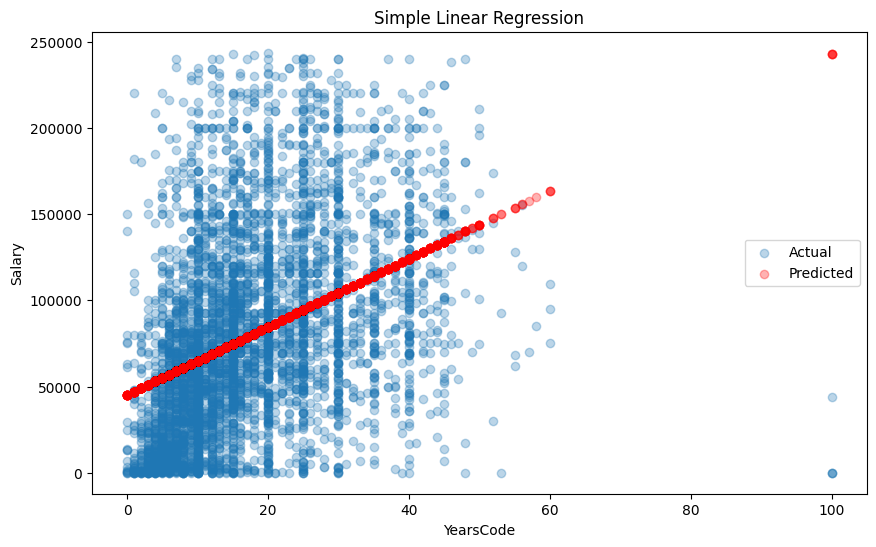

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.3, label='Actual')
plt.scatter(X_test, y_pred, alpha=0.3, color='red', label='Predicted')
plt.xlabel(most_correlated)
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


## Multiple Linear Regression


In [128]:
X = df_ml.drop('target', axis=1)
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

y_pred = lr_multiple.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${mean_squared_error(y_test, y_pred, squared=False):,.0f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")


R² Score: 0.238
RMSE: $49,916
MAE: $39,014


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Feature importance from Multiple Regression


In [130]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_multiple.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(feature_importance.head(20))


                         feature   coefficient
31                     lang_Dart -16926.953921
32                    lang_Swift   9952.177496
26                       lang_Go   9871.500152
24                      lang_PHP  -8037.695582
9                       lang_PHP  -8037.695582
19               lang_TypeScript   7033.821530
30                     lang_Ruby   7020.998165
12                     lang_Ruby   7020.998165
23                      lang_C++  -6409.821402
33                   lang_Groovy   5110.629493
17                   lang_Python   4914.186299
15                 lang_HTML/CSS  -4739.027470
27                     lang_Rust   4528.109410
5   lang_Bash/Shell (all shells)   3870.043797
18  lang_Bash/Shell (all shells)   3870.043797
21                     lang_Java  -2451.556355
22               lang_PowerShell   2384.727472
0                      YearsCode   1811.852509
29                      lang_Lua  -1773.170906
3                JobSatPoints_11  -1626.407515


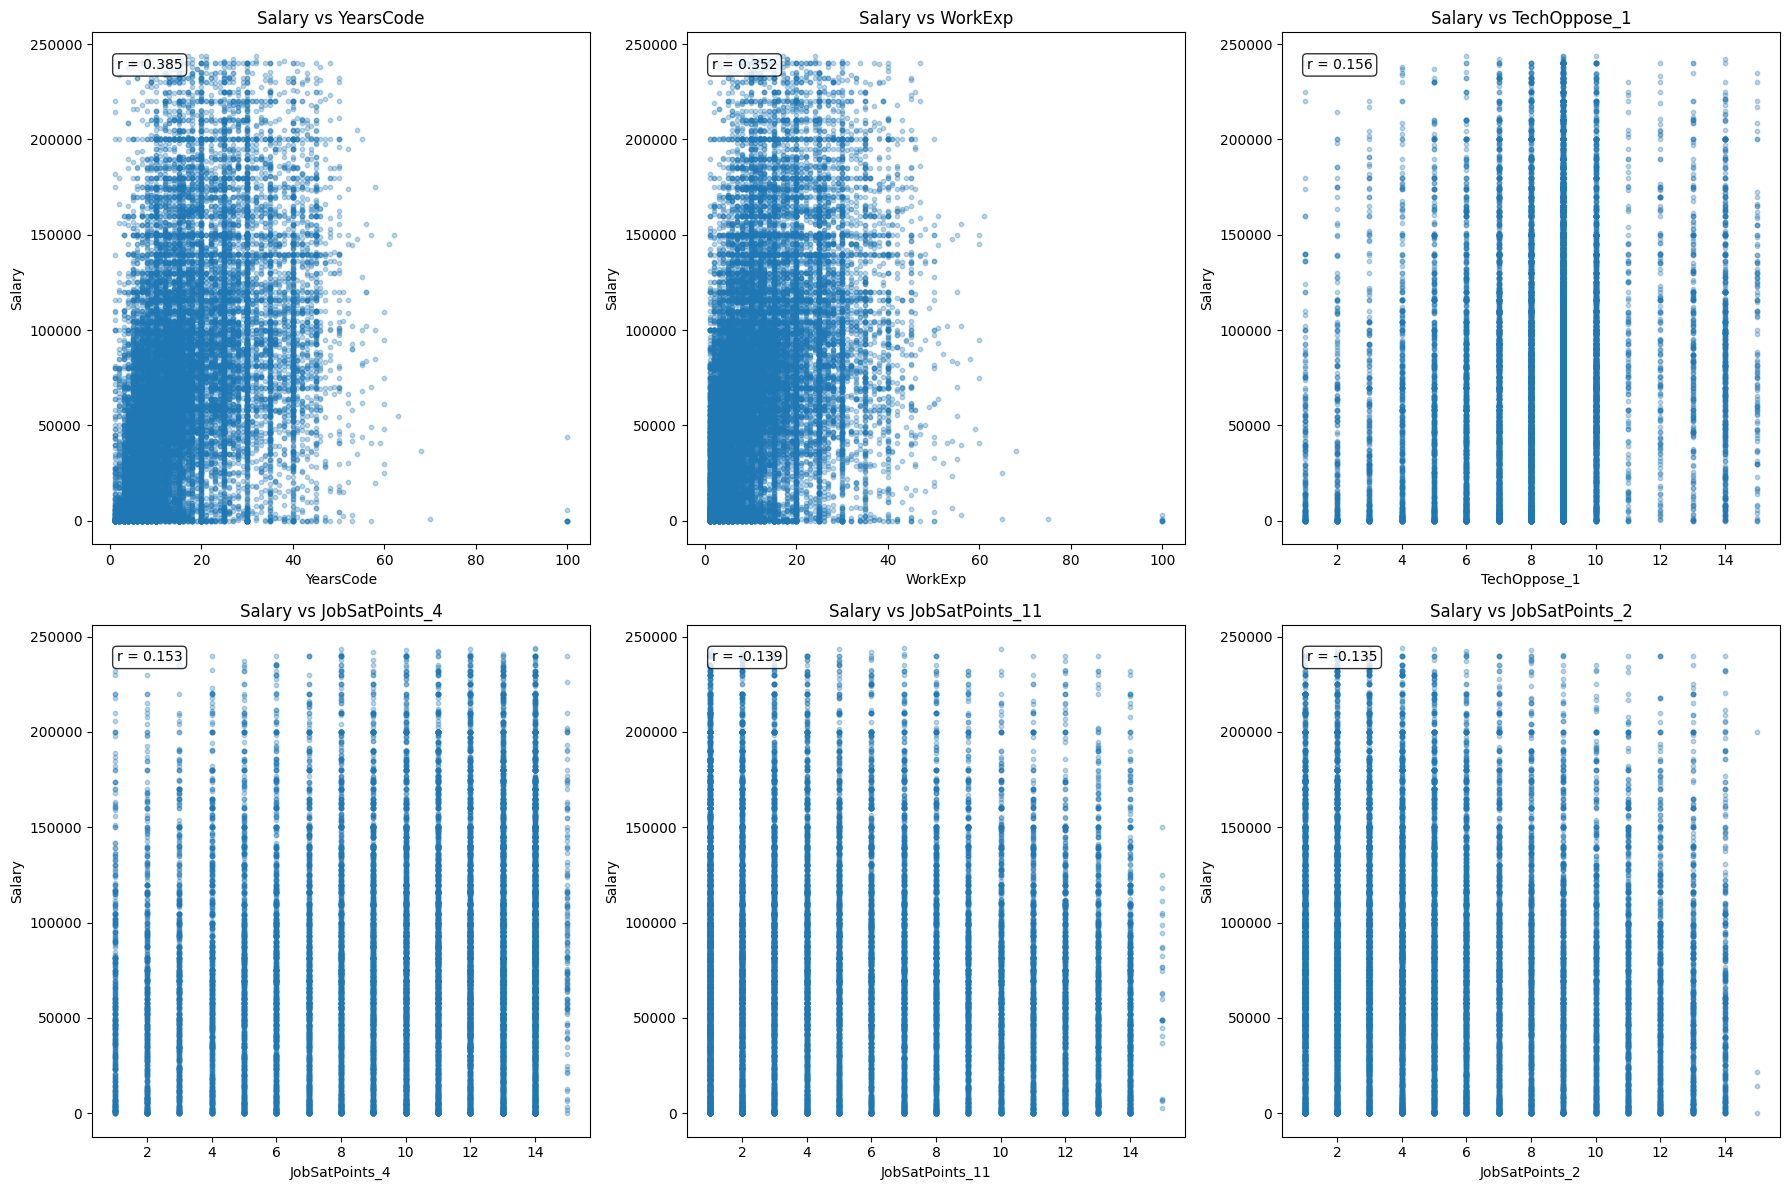

In [131]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

top_features = correlations.head(6).index.tolist()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df_reg[feature], df_reg['target'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Salary')
    axes[idx].set_title(f'Salary vs {feature}')
    
    corr = df_reg[[feature, 'target']].corr().iloc[0, 1]
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=axes[idx].transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## PCA + Multiple Regression


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [133]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components: {pca.n_components_}")
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.3f}")


Number of components: 26
Explained variance: 0.954


In [134]:
lr_pca = LinearRegression()
lr_pca.fit(X_pca, y_train)

y_pred = lr_pca.predict(X_test_pca)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${mean_squared_error(y_test, y_pred, squared=False):,.0f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")


R² Score: 0.237
RMSE: $49,954
MAE: $39,040


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Random Forest Regressor


In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: ${mean_squared_error(y_test, y_pred, squared=False):,.0f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")


R² Score: 0.270
RMSE: $48,882
MAE: $38,435


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [136]:
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance_rf.head(15))


            feature  importance
0         YearsCode    0.343024
11    TechEndorse_4    0.053486
7    JobSatPoints_6    0.049754
10  JobSatPoints_16    0.048603
3   JobSatPoints_11    0.046723
1      TechOppose_1    0.044986
6     TechEndorse_1    0.044390
4    JobSatPoints_2    0.044216
2    JobSatPoints_4    0.042745
8     SO_Actions_10    0.041146
34           JobSat    0.022857
13           JobSat    0.022809
26          lang_Go    0.016723
24         lang_PHP    0.012862
9          lang_PHP    0.011162


Let's train a model with all the features to see if we have some accuracy improvement. Tree-based models (Random Forest, XGBoost) can handle high-dimensional data and do feature selection internally

In [137]:
df_all_features = df_reg.copy()

In [138]:
df_all_features = df_all_features.drop(columns=categorical_cols_all, errors='ignore')

X_all = df_all_features.drop('target', axis=1)
y_all = df_all_features['target']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [139]:
rf_all = RandomForestRegressor(
    n_estimators=200,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt', 
    random_state=42,
    n_jobs=-1
)

rf_all.fit(X_train_all, y_train_all)
y_pred_rf_all = rf_all.predict(X_test_all)

r2_rf_all = r2_score(y_test_all, y_pred_rf_all)
rmse_rf_all = mean_squared_error(y_test_all, y_pred_rf_all, squared=False)
mae_rf_all = mean_absolute_error(y_test_all, y_pred_rf_all)

print(f"R² Score: {r2_rf_all:.3f}")
print(f"RMSE: ${rmse_rf_all:,.0f}")
print(f"MAE: ${mae_rf_all:,.0f}")


R² Score: 0.518
RMSE: $39,691
MAE: $29,380


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [140]:
xgb_all = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    colsample_bylevel=0.8, 
    min_child_weight=3,
    random_state=42,
    n_jobs=-1
)

xgb_all.fit(X_train_all, y_train_all)
y_pred_xgb_all = xgb_all.predict(X_test_all)

r2_xgb_all = r2_score(y_test_all, y_pred_xgb_all)
rmse_xgb_all = mean_squared_error(y_test_all, y_pred_xgb_all, squared=False)
mae_xgb_all = mean_absolute_error(y_test_all, y_pred_xgb_all)

print(f"R² Score: {r2_xgb_all:.3f}")
print(f"RMSE: ${rmse_xgb_all:,.0f}")
print(f"MAE: ${mae_xgb_all:,.0f}")

R² Score: 0.696
RMSE: $31,516
MAE: $20,576


/Users/monica.novelli/ds-journey/.venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hyperparameter Tuning for XGBoost

Let's fine-tune XGBoost to see if we can squeeze even more performance!


In [ ]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'min_child_weight': [1, 3, 5]
}

xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

print("Starting hyperparameter tuning (this may take 5-10 minutes)...")

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_all, y_train_all)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV R²: {grid_search.best_score_:.3f}")


Starting hyperparameter tuning (this may take 5-10 minutes)...
Fitting 3 folds for each of 324 candidates, totalling 972 fits


### Evaluate Tuned Model


In [ ]:
best_xgb = grid_search.best_estimator_

y_pred_tuned = best_xgb.predict(X_test_all)

r2_tuned = r2_score(y_test_all, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test_all, y_pred_tuned, squared=False)
mae_tuned = mean_absolute_error(y_test_all, y_pred_tuned)

print(f"Tuned XGBoost - R²: {r2_tuned:.3f} | RMSE: ${rmse_tuned:,.0f} | MAE: ${mae_tuned:,.0f}")

print("\n" + "="*70)
print("COMPARISON: Baseline vs Tuned XGBoost")
print("="*70)
comparison = pd.DataFrame({
    'Model': ['XGBoost (Baseline)', 'XGBoost (Tuned)'],
    'R² Score': [r2_xgb_all, r2_tuned],
    'RMSE': [rmse_xgb_all, rmse_tuned],
    'MAE': [mae_xgb_all, mae_tuned]
})
print(comparison.to_string(index=False))
print("="*70)

improvement = ((r2_tuned - r2_xgb_all) / r2_xgb_all) * 100
print(f"\nImprovement: {improvement:+.2f}%")

if r2_tuned > r2_xgb_all:
    print("✅ Hyperparameter tuning improved the model!")
elif abs(r2_tuned - r2_xgb_all) < 0.01:
    print("≈ Performance is similar - baseline was already well-tuned!")
else:
    print("⚠️ Baseline performed better - this can happen due to overfitting or random variation")


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(comparison['Model'], comparison['R² Score'], color=['#ea1d2cff', '#4CAF50'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].axhline(y=0.70, color='gold', linestyle='--', label='Target (0.70)', linewidth=2)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=15)

axes[1].bar(comparison['Model'], comparison['RMSE'], color=['#ea1d2cff', '#4CAF50'])
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('RMSE Comparison (Lower is Better)')
axes[1].tick_params(axis='x', rotation=15)

axes[2].bar(comparison['Model'], comparison['MAE'], color=['#ea1d2cff', '#4CAF50'])
axes[2].set_ylabel('MAE ($)')
axes[2].set_title('MAE Comparison (Lower is Better)')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


### Feature Importance from Tuned Model


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_all.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(top_20['feature'], top_20['importance'], color='#ea1d2cff')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features (Tuned XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
n_features_90 = (feature_importance['cumulative_importance'] <= 0.90).sum()
print(f"\n{n_features_90} features explain 90% of model predictions")


MT

ODES

E, I LIKE TH

. PLEASE, REMEMBER 